# Setup

In [1]:
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten, Activation, Conv2D, Dropout, BatchNormalization, MaxPool2D

from keras.callbacks import TensorBoard
from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,regularizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import cv2
import shutil
import platform

from PIL import Image
import tensorflow as tf

Using TensorFlow backend.


In [2]:
#For using GPU to improving computation time
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#Needed check system
platform.system()

'Windows'

https://www.kaggle.com/grassknoted/asl-alphabet

# Path

In [4]:
if platform.system() == 'Windows':
    train_path = "asl_alphabet_train\\asl_alphabet_train\\"
    test_path = 'asl_alphabet_test\\asl_alphabet_test\\'
if platform.system() == 'Darwin':
    train_path = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
    test_path = 'asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

This quick way for me to label all my classes

In [5]:
CATEGORIES = []

for i in range(0,26):
    CATEGORIES.append(chr(ord('A') + i))

CATEGORIES.append('space')
CATEGORIES.append('nothing')
CATEGORIES.append('del')

In [6]:
train_path

'asl_alphabet_train\\asl_alphabet_train\\'

# Preprocessing Data

In [7]:
generator = ImageDataGenerator(validation_split=0.2, rescale=1/255.0)
generator1 = ImageDataGenerator(validation_split=0.2, rescale=1/255.0)
train_batches = generator.flow_from_directory(train_path,
                                              target_size=(200,200),
                                              classes = CATEGORIES,
                                              color_mode='rgb',
                                              batch_size=30,
                                              subset='training')
valid_batches = generator1.flow_from_directory(train_path,
                                              target_size=(200,200),
                                              classes = CATEGORIES,
                                              color_mode='rgb',
                                              batch_size=10,
                                              subset= 'validation')


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [8]:
test_path

'asl_alphabet_test\\asl_alphabet_test\\'

In [9]:
test_labels = []
test_images = []
width = 200.0
height = 200.0
for name in os.listdir(test_path):
    temp_test_labels = [0 for i in range(29)]
    if name[-3:] == 'jpg':
        category, _ = name.split('_')
        temp_test_labels[train_batches.class_indices[category]] = 1
        test_labels.append(temp_test_labels)
        with Image.open(test_path + name) as image:
            newsize = (200, 200)
            #width,height = image.size
            image = image.resize(newsize)
            test_images.append(np.array(image)/ 255.0)
        
       
        
    
        
    

In [10]:
images, labels = next(train_batches)


In [11]:
def plot_images(images):
    for i in range(5):
        plt.imshow((images[i]))
        plt.title(CATEGORIES[int(np.where(labels[i] == 1)[0])])
        plt.show()

# Plotting Images

Can verify labels are correct with provided chart

In [12]:
%%html
<img src="RefImg.jpg" alt="ASL-Alphabet">

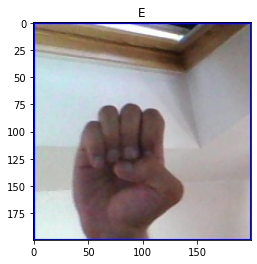

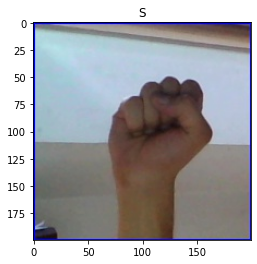

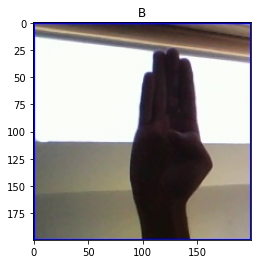

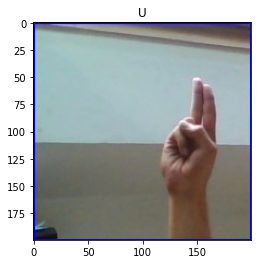

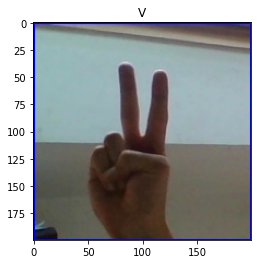

In [13]:
plot_images(images)

# Build Model

In [14]:
model = Sequential()
model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(200,200,3)))

model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
#model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
#model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))

model.add(BatchNormalization())

model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(29, activation='softmax'))

In [15]:
model.compile(optimizer= 'sgd', loss= "categorical_crossentropy", metrics=['accuracy'])

In [16]:
model.fit_generator(train_batches,
                    steps_per_epoch=30,
                    validation_data=valid_batches,
                    validation_steps=10,
                    epochs=20,
                    verbose=2)

Epoch 1/20
 - 6s - loss: 4.3050 - accuracy: 0.0978 - val_loss: 4.3750 - val_accuracy: 0.0200
Epoch 2/20
 - 4s - loss: 4.1454 - accuracy: 0.1511 - val_loss: 4.3814 - val_accuracy: 0.0200
Epoch 3/20
 - 3s - loss: 3.9639 - accuracy: 0.1900 - val_loss: 4.1817 - val_accuracy: 0.0600
Epoch 4/20
 - 3s - loss: 3.8939 - accuracy: 0.2044 - val_loss: 4.3237 - val_accuracy: 0.0800
Epoch 5/20
 - 3s - loss: 3.6901 - accuracy: 0.2489 - val_loss: 4.3880 - val_accuracy: 0.0400
Epoch 6/20
 - 3s - loss: 3.5429 - accuracy: 0.3122 - val_loss: 4.6958 - val_accuracy: 0.0700
Epoch 7/20
 - 3s - loss: 3.5255 - accuracy: 0.2811 - val_loss: 4.2113 - val_accuracy: 0.0500
Epoch 8/20
 - 3s - loss: 3.3717 - accuracy: 0.3344 - val_loss: 4.2455 - val_accuracy: 0.0600
Epoch 9/20
 - 3s - loss: 3.2735 - accuracy: 0.3622 - val_loss: 5.2909 - val_accuracy: 0.0500
Epoch 10/20
 - 3s - loss: 3.1593 - accuracy: 0.3978 - val_loss: 5.0440 - val_accuracy: 0.0400
Epoch 11/20
 - 3s - loss: 2.9981 - accuracy: 0.4300 - val_loss: 4.407

vgg16_model = keras.applications.vgg16.VGG16()


# Modify Model


In [17]:
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet',
            include_top=False,
            input_shape=(200, 200, 3))



In [18]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [20]:
model = Sequential()
#removing last layer and add mine
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(29, activation='softmax'))

In [21]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               3686600   
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 29)                5829      
Total params: 18,447,317
Trainable params: 18,447,317
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer= 'sgd', loss= "categorical_crossentropy", metrics=['accuracy'])

In [54]:
history = model.fit_generator(train_batches,
                    steps_per_epoch=30,
                    validation_data=valid_batches,
                    validation_steps=10,
                    epochs=20,
                    verbose=2)

Epoch 1/20
 - 6s - loss: 0.1369 - accuracy: 0.9600 - val_loss: 1.0000 - val_accuracy: 0.6800
Epoch 2/20
 - 6s - loss: 0.1483 - accuracy: 0.9589 - val_loss: 0.1093 - val_accuracy: 0.8500
Epoch 3/20
 - 6s - loss: 0.0735 - accuracy: 0.9800 - val_loss: 0.2887 - val_accuracy: 0.9000
Epoch 4/20
 - 6s - loss: 0.0612 - accuracy: 0.9856 - val_loss: 0.0680 - val_accuracy: 0.9000
Epoch 5/20
 - 6s - loss: 0.1539 - accuracy: 0.9522 - val_loss: 0.6970 - val_accuracy: 0.8100
Epoch 6/20
 - 6s - loss: 0.1304 - accuracy: 0.9644 - val_loss: 0.1781 - val_accuracy: 0.9200
Epoch 7/20
 - 6s - loss: 0.0676 - accuracy: 0.9867 - val_loss: 0.4728 - val_accuracy: 0.8600
Epoch 8/20
 - 6s - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.2780 - val_accuracy: 0.8700
Epoch 9/20
 - 6s - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.1873 - val_accuracy: 0.9000
Epoch 10/20
 - 6s - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.4716 - val_accuracy: 0.8900
Epoch 11/20
 - 6s - loss: 0.0639 - accuracy: 0.9844 - val_loss: 0.396

# Testing Model

In [55]:
model.evaluate(np.array(test_images),np.array(test_labels))

28/28 [==============================] - 0s 3ms/step


[0.11749126762151718, 0.9642857313156128]

# Some useful Functions 

In [79]:
def show_guess(prediction, top_k = 3):
    mapping = dict()
    prediction = np.round(prediction, decimals= 3)
    for i in range(prediction.size):
        mapping[CATEGORIES[i]] = prediction[0][i]
    return sorted(mapping.items(), key= lambda x: x[1], reverse=True)[:top_k]
    

In [81]:
def real_image_test(image, top_k = 3):
    img = Image.open(image)
    img = img.resize((200, 200))
    img_arr = np.array(img)/ 255.0
    image = np.expand_dims(img_arr, axis = 0)
    print(f"Model has predicted {CATEGORIES[model.predict(image).argmax()]}")
    print(show_guess(model.predict(image), top_k= top_k))
    plt.imshow(image[0])
    plt.show()

In [82]:
def merge_test(a,b):
    return [(a[i], b[i]) for i in range(len(a))]

In [83]:

def verify_test_image(TEST_IMAGES,image_number=0):
    image , label = TEST_IMAGES[image_number]
    plt.imshow(image)
    img = np.expand_dims(image, axis = 0)
    prediction = model.predict(img)
    print(f"Model has predicted {CATEGORIES[prediction.argmax()]}")
    print(show_guess(model.predict(img)))
    actual = CATEGORIES[np.argmax(label)]
    plt.title(f"This is the image of an {actual}")
    plt.imshow(image)
     

# Testing Model

In [84]:
TEST_IMAGES = merge_test(test_images,test_labels)


Model has predicted K
[('K', 0.978), ('R', 0.012), ('D', 0.002)]


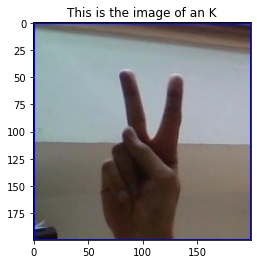

In [91]:
verify_test_image(TEST_IMAGES,10)

# Visualize Model Training History

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


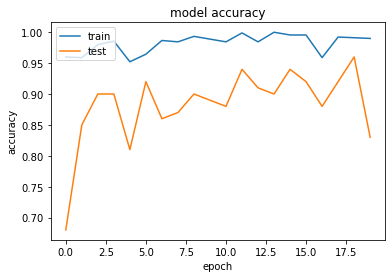

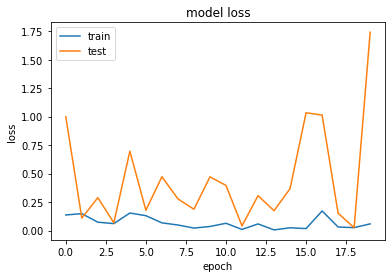

In [86]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model has predicted Q
[('Q', 0.926), ('L', 0.025), ('J', 0.01)]


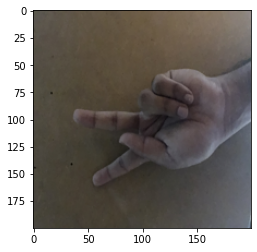

In [97]:
#This fails :( suppose to be a K
real_image_test('K_Tyron1.jpg')

In [98]:
model.save('tyron_model.h5')